Итоговая работа
=====================

Поздравляю вас, теперь вы вооружены знаниями по предобработке данных, и пора применить их на интересном кейсе.

Представлены данные такси, по которым мы должны предсказать возьмёт ли таксист заказ или нет(driver_response).

Принципы вы знаете, чек-лист аналогичен лабораторной работе.

Чек-лист:
1. Загрузите датасет taxi.csv.
2. Посмотрите на данные. Отобразите общую информацию по признакам (вспомните о describe и info). Напишите в markdown свои наблюдения.
3. Выявите пропуски, а также возможные причины их возникновения. Решите, что следует сделать с ними. Напишите в markdown свои наблюдения.
4. Оцените зависимости переменных между собой. Используйте корреляции. Будет хорошо, если воспользуетесь profile_report. Напишите в markdown свои наблюдения.
5. Определите стратегию преобразования категориальных признаков (т.е. как их сделать адекватными для моделей).
6. Найдите признаки, которые можно разделить на другие, или преобразовать в другой тип данных. Удалите лишние, при необходимости.
7. Разделите выборку на обучаемую и тестовую.
8. Обучите модель. Напишите в markdown свои наблюдения по полученным результатам. Хорошие результаты дают классификаторы RandomForest и XGBoost

Если возникнут затруднения, то смотрите на материал практических занятий. Данного там должно хватить для выполнения всех пунктов. Желаю успеха!

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('taxi.csv')

In [3]:
df.head()

,offer_gk,weekday_key,hour_key,driver_gk,order_gk,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,duration_min,offer_class_group,ride_type_desc,driver_response
0,1105373,5,20,6080,174182,55.818842,37.334562,55.814567,37.355010,-1.000,-1.000,Economy,private,0
1,759733,5,14,6080,358774,55.805342,37.515023,55.819329,37.466398,18.802,25.217,Standard,private,1
2,416977,6,14,6080,866260,55.813978,37.347688,55.814827,37.354074,6.747,9.800,Economy,private,0
3,889660,2,6,6080,163522,55.745922,37.421748,55.743469,37.431130,-1.000,-1.000,Economy,private,1
4,1120055,4,16,6080,506710,55.803578,37.521602,55.812559,37.527407,12.383,19.250,Economy,private,1


In [4]:
df.shape

(100000, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   offer_gk                100000 non-null  int64  
 1   weekday_key             100000 non-null  int64  
 2   hour_key                100000 non-null  int64  
 3   driver_gk               100000 non-null  int64  
 4   order_gk                100000 non-null  int64  
 5   driver_latitude         100000 non-null  float64
 6   driver_longitude        100000 non-null  float64
 7   origin_order_latitude   100000 non-null  float64
 8   origin_order_longitude  100000 non-null  float64
 9   distance_km             100000 non-null  float64
 10  duration_min            100000 non-null  float64
 11  offer_class_group       100000 non-null  object 
 12  ride_type_desc          100000 non-null  object 
 13  driver_response         100000 non-null  int64  
dtypes: float64(6), int64(

In [6]:
df.describe()

,offer_gk,weekday_key,hour_key,driver_gk,order_gk,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,duration_min,driver_response
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,5.662189e+05,3.159860,13.827790,3446.376360,460867.01291,55.700824,37.492292,55.772440,37.541637,18.393518,23.134841,0.492480
std,3.259360e+05,2.054222,7.306496,2038.738677,266064.98953,2.135903,1.454640,0.665985,0.467758,41.129296,33.890105,0.499946
min,4.000000e+00,0.000000,0.000000,14.000000,18.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,2.855552e+05,1.000000,8.000000,1421.000000,229178.50000,55.708651,37.413497,55.708032,37.407117,-1.000000,-1.000000,0.000000
50%,5.656715e+05,3.000000,16.000000,3506.500000,462420.00000,55.772904,37.533664,55.772561,37.532537,10.411500,19.700000,0.000000
75%,8.487198e+05,5.000000,20.000000,5242.000000,690894.00000,55.960667,37.624113,55.962000,37.624358,30.665250,37.867000,1.000000
max,1.130355e+06,6.000000,23.000000,6806.000000,920344.00000,56.174097,38.280547,56.311121,38.243608,5234.283000,3958.283000,1.000000


In [7]:
df.isna().sum()

offer_gk                  0
weekday_key               0
hour_key                  0
driver_gk                 0
order_gk                  0
driver_latitude           0
driver_longitude          0
origin_order_latitude     0
origin_order_longitude    0
distance_km               0
duration_min              0
offer_class_group         0
ride_type_desc            0
driver_response           0
dtype: int64

По ссылке https://www.crowdanalytix.com/contests/mckinsey-big-data-hackathon нашёл описание признаков. Оставлю для себя, чтобы лучше понимать о чём идёт речь

offer_gk – unique offer identifier (INT) \
weekday_key – day of week number (Sunday = 0, Monday = 1, etc.) (INT) \
hour_key – hour of day representing an hour part of datetime (value from 0 to 23) (INT) \
driver_gk – unique driver identifier (INT) \
order_gk – unique order identifier (INT). Order may have multiple offers\
driver_latitude – latitude of driver at the time of getting an offer (FLOAT) \
driver_longitude – longitude of driver at the time of receiving an offer (FLOAT)\
origin_order_latitude – latitude of the order start location at the time of receiving an offer (FLOAT)\
origin_order_longitude – longitude of the order start location at the moment of receiving an offer (FLOAT)\
distance_km – estimated distance from origin to destination in kilometres (FLOAT). Value -1 means that the destination is not set\
duration_min – estimated duration from origin to destination in minutes (FLOAT). Value -1 means that the destination is not set\
offer_class_group – class of the order, e.g. Economy, Business, XL (VARCHAR)\
ride_type_desc – private or business order attribute (VARCHAR)\
driver_response – driver choice of whether to accept the offer or not (VARCHAR) \

### Наблюдения

1. Пропусков нет. Это хорошо
2. Offer_gk - перенести в индекс
3. driver_gk и order_gk - удалить, так как они не несут в себе полезной нагрузки. По крайней мере с первого взгляда
4. Широта и долгота вероятно связаны с расстоянием (distance_km) и длительностью поездки duration_min. Нужно поковырять
5. offer_class_group и ride_type_desc перевести в число
6. Вероятно по выходным и позднее время стоимость поездки меняется. По разговорам с таксистами самое хорошее для них время - вечер-ночь четверга, пятницы, субботы. Нужно проверить

### Корреляция

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

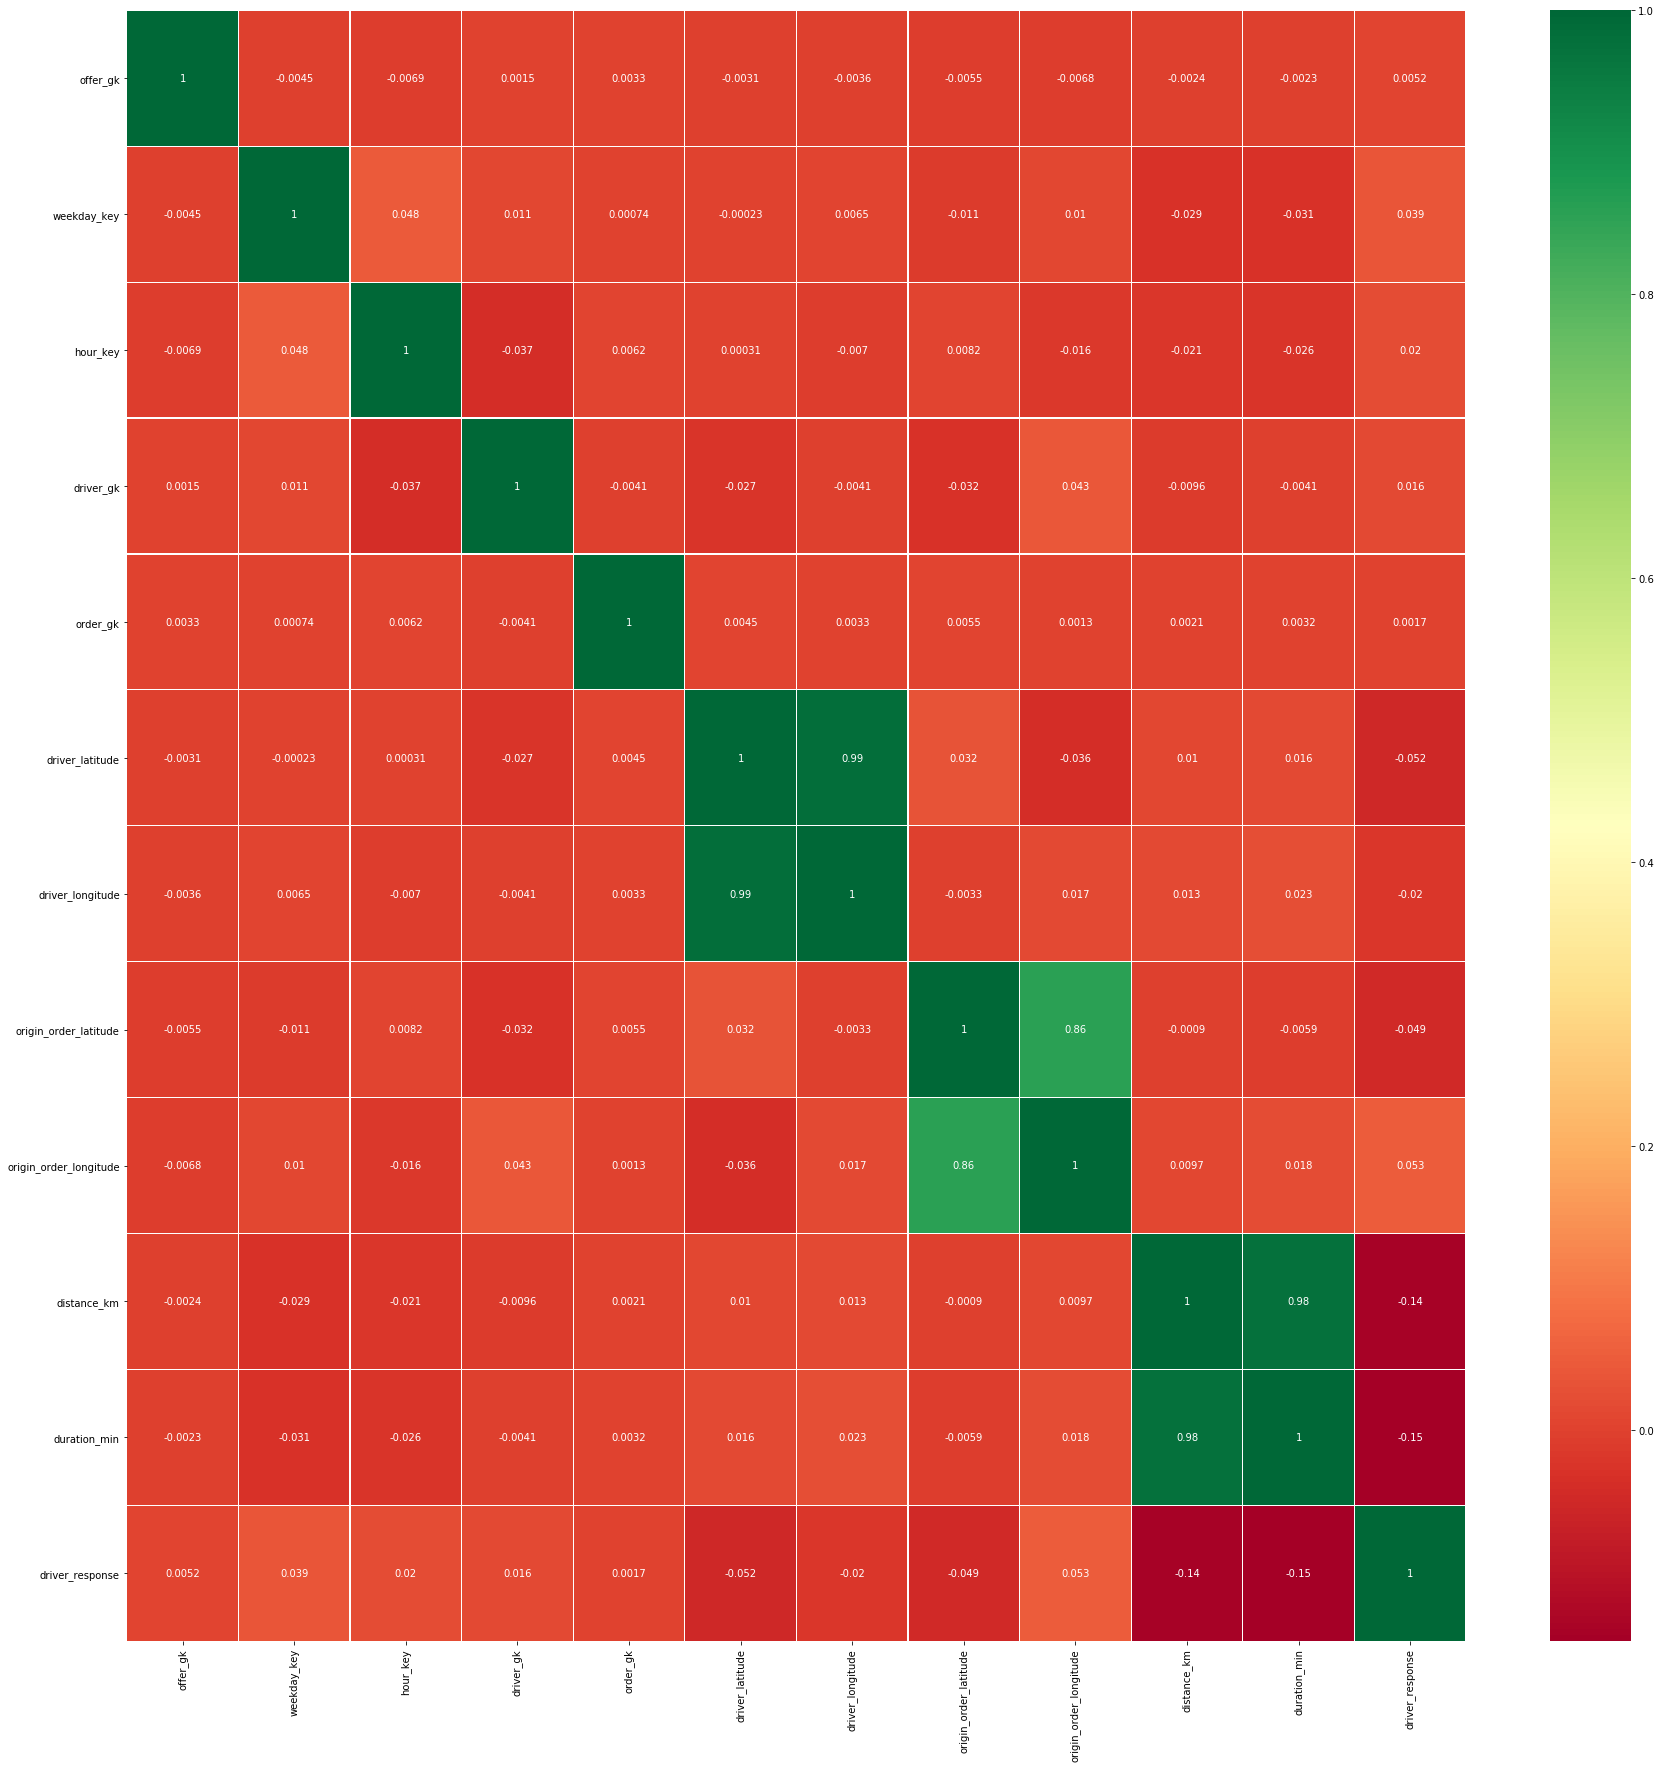

In [9]:
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(30,30)
plt.show()

Выводы:
    1. Нужно заменить соответствующие longtitude и latitude одним признаком
    2. Заменить duration и distance одним признаком
    3. Чем выше duration и distance тем ниже drive response

#### Заменяю расстояние и скорость одним признаком

In [10]:
df['duration_hours'] = df.duration_min / 60 # переведу в часы для простоты восприятия
df['speed'] = df.distance_km / df.duration_hours
df.loc[df['duration_hours'] < 0 , 'speed'] = -1
# df.drop(['distance_km', 'duration_hours', 'duration_min'], axis=1, inplace=True)
df.head()

,offer_gk,weekday_key,hour_key,driver_gk,order_gk,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,duration_min,offer_class_group,ride_type_desc,driver_response,duration_hours,speed
0,1105373,5,20,6080,174182,55.818842,37.334562,55.814567,37.355010,-1.000,-1.000,Economy,private,0,-0.016667,-1.000000
1,759733,5,14,6080,358774,55.805342,37.515023,55.819329,37.466398,18.802,25.217,Standard,private,1,0.420283,44.736487
2,416977,6,14,6080,866260,55.813978,37.347688,55.814827,37.354074,6.747,9.800,Economy,private,0,0.163333,41.308163
3,889660,2,6,6080,163522,55.745922,37.421748,55.743469,37.431130,-1.000,-1.000,Economy,private,1,-0.016667,-1.000000
4,1120055,4,16,6080,506710,55.803578,37.521602,55.812559,37.527407,12.383,19.250,Economy,private,1,0.320833,38.596364


In [11]:
df.loc[df['speed'].isna(), :].head()

,offer_gk,weekday_key,hour_key,driver_gk,order_gk,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,duration_min,offer_class_group,ride_type_desc,driver_response,duration_hours,speed
859,346101,4,12,4215,70206,55.758458,37.710545,55.747802,37.715600,0.0,0.0,Economy,private,1,0.0,NaN
1179,166480,5,8,1706,234100,55.787066,37.563235,55.792505,37.563787,0.0,0.0,Economy,private,1,0.0,NaN
2435,839922,3,12,6792,845047,55.415367,37.898310,55.410307,37.902451,0.0,0.0,Standard,private,1,0.0,NaN
2918,904433,5,18,1514,228992,55.681763,37.480773,55.671333,37.464131,0.0,0.0,Standard,private,0,0.0,NaN
3357,149416,4,6,4269,401598,55.961844,37.409798,55.961995,37.406355,0.0,0.0,Economy,private,0,0.0,NaN


В теории можно сделать следующее: рассчитать distance по координатам. Найти похожие значения времени для теперь уже известных distance,заполнить пропуски. Но я просто дропну эти значения, так как их маленькое количество

In [12]:
df = df.loc[~df['speed'].isna(), :]

#### Смотрим, что с offer_class_group и ride_type_desc

In [13]:
df.offer_class_group.value_counts()

Economy     48270
Standard    47216
Premium      1767
Delivery     1286
Kids          587
XL            460
VIP           225
VIP+           29
Test            8
Name: offer_class_group, dtype: int64

Дропну тестовые значения

In [14]:
df = df.loc[df['offer_class_group'] != 'Test', :]
df.shape

(99840, 16)

In [15]:
df.ride_type_desc.value_counts()

private      91055
business      8533
affiliate      224
SMB             28
Name: ride_type_desc, dtype: int64

Заменю 0 и 1

In [16]:
encoded_vals = pd.get_dummies(df[['offer_class_group', 'ride_type_desc']], drop_first=True)
encoded_vals.head()

,offer_class_group_Economy,offer_class_group_Kids,offer_class_group_Premium,offer_class_group_Standard,offer_class_group_VIP,offer_class_group_VIP+,offer_class_group_XL,ride_type_desc_affiliate,ride_type_desc_business,ride_type_desc_private
0,1,0,0,0,0,0,0,0,0,1
1,0,0,0,1,0,0,0,0,0,1
2,1,0,0,0,0,0,0,0,0,1
3,1,0,0,0,0,0,0,0,0,1
4,1,0,0,0,0,0,0,0,0,1


In [17]:
encoded_vals.shape

(99840, 10)

In [18]:
df = df.merge(encoded_vals, how='left', left_index=True, right_index=True)

In [19]:
df.drop(['offer_class_group', 'ride_type_desc'], axis=1, inplace=True)

In [20]:
df.head()

,offer_gk,weekday_key,hour_key,driver_gk,order_gk,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,...,offer_class_group_Economy,offer_class_group_Kids,offer_class_group_Premium,offer_class_group_Standard,offer_class_group_VIP,offer_class_group_VIP+,offer_class_group_XL,ride_type_desc_affiliate,ride_type_desc_business,ride_type_desc_private
0,1105373,5,20,6080,174182,55.818842,37.334562,55.814567,37.355010,-1.000,...,1,0,0,0,0,0,0,0,0,1
1,759733,5,14,6080,358774,55.805342,37.515023,55.819329,37.466398,18.802,...,0,0,0,1,0,0,0,0,0,1
2,416977,6,14,6080,866260,55.813978,37.347688,55.814827,37.354074,6.747,...,1,0,0,0,0,0,0,0,0,1
3,889660,2,6,6080,163522,55.745922,37.421748,55.743469,37.431130,-1.000,...,1,0,0,0,0,0,0,0,0,1
4,1120055,4,16,6080,506710,55.803578,37.521602,55.812559,37.527407,12.383,...,1,0,0,0,0,0,0,0,0,1


#### Смотрим, что с остальными

In [21]:
df.driver_gk.nunique()

439

Всё-таки оставлю driver_gk. Разные водители могут по разному принимать решения брать заказ или нет

In [22]:
df.offer_gk.nunique()

99840

In [23]:
df.order_gk.nunique()

81304

order_gk – unique order identifier (INT). Order may have multiple offers. Это объясняет, почему значения не уникальные

In [24]:
df[df['order_gk'].duplicated(keep=False)].sort_values(by='order_gk', ascending=False).head(10)

,offer_gk,weekday_key,hour_key,driver_gk,order_gk,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,...,offer_class_group_Economy,offer_class_group_Kids,offer_class_group_Premium,offer_class_group_Standard,offer_class_group_VIP,offer_class_group_VIP+,offer_class_group_XL,ride_type_desc_affiliate,ride_type_desc_business,ride_type_desc_private
93678,54833,0,21,6554,920205,55.414679,37.898982,55.410307,37.902451,-1.000,...,1,0,0,0,0,0,0,0,0,1
35424,19822,0,21,1944,920205,55.418834,37.894595,55.410307,37.902451,-1.000,...,1,0,0,0,0,0,0,0,0,1
73395,801304,6,17,462,919902,55.962084,37.417515,55.966563,37.415485,60.447,...,1,0,0,0,0,0,0,0,0,1
17099,1052369,6,17,5718,919902,55.962322,37.407117,55.966563,37.415485,60.447,...,1,0,0,0,0,0,0,0,0,1
70044,849131,6,17,4490,919902,55.961872,37.409643,55.966563,37.415485,60.447,...,1,0,0,0,0,0,0,0,0,1
99129,663653,6,17,2442,919902,55.961342,37.413560,55.966563,37.415485,60.447,...,1,0,0,0,0,0,0,0,0,1
28616,592324,6,17,1060,919902,55.961859,37.407126,55.966563,37.415485,60.447,...,1,0,0,0,0,0,0,0,0,1
30584,655831,6,17,5917,919902,55.962323,37.407117,55.966563,37.415485,60.447,...,1,0,0,0,0,0,0,0,0,1
26158,491715,6,17,1793,919902,55.962323,37.407117,55.966563,37.415485,60.447,...,1,0,0,0,0,0,0,0,0,1
46221,832424,5,14,3959,919780,55.414654,37.898785,55.410307,37.902451,43.642,...,0,0,0,1,0,0,0,0,0,1


#### driver_latitude, driver_longitude  versus origin_order_latitude, origin_order_longitude
Вычислю расстояние по коордианатам

In [25]:
from numpy import sqrt

In [26]:
df['distance'] = sqrt((df['driver_latitude'] - df['origin_order_latitude'])**2 + (df['driver_longitude'] - df['origin_order_longitude'])**2)

In [27]:
df.drop(['driver_latitude', 'driver_longitude', 'origin_order_latitude', 'origin_order_longitude'], axis=1, inplace=True)

In [28]:
df.head()

,offer_gk,weekday_key,hour_key,driver_gk,order_gk,distance_km,duration_min,driver_response,duration_hours,speed,...,offer_class_group_Kids,offer_class_group_Premium,offer_class_group_Standard,offer_class_group_VIP,offer_class_group_VIP+,offer_class_group_XL,ride_type_desc_affiliate,ride_type_desc_business,ride_type_desc_private,distance
0,1105373,5,20,6080,174182,-1.000,-1.000,0,-0.016667,-1.000000,...,0,0,0,0,0,0,0,0,1,0.020890
1,759733,5,14,6080,358774,18.802,25.217,1,0.420283,44.736487,...,0,0,1,0,0,0,0,0,1,0.050597
2,416977,6,14,6080,866260,6.747,9.800,0,0.163333,41.308163,...,0,0,0,0,0,0,0,0,1,0.006442
3,889660,2,6,6080,163522,-1.000,-1.000,1,-0.016667,-1.000000,...,0,0,0,0,0,0,0,0,1,0.009697
4,1120055,4,16,6080,506710,12.383,19.250,1,0.320833,38.596364,...,0,0,0,0,0,0,0,0,1,0.010694


#### Перенесу offer_gk в индекс

In [29]:
df.set_index('offer_gk', inplace=True)
df.index.name = None
df.head()

,weekday_key,hour_key,driver_gk,order_gk,distance_km,duration_min,driver_response,duration_hours,speed,offer_class_group_Economy,offer_class_group_Kids,offer_class_group_Premium,offer_class_group_Standard,offer_class_group_VIP,offer_class_group_VIP+,offer_class_group_XL,ride_type_desc_affiliate,ride_type_desc_business,ride_type_desc_private,distance
1105373,5,20,6080,174182,-1.000,-1.000,0,-0.016667,-1.000000,1,0,0,0,0,0,0,0,0,1,0.020890
759733,5,14,6080,358774,18.802,25.217,1,0.420283,44.736487,0,0,0,1,0,0,0,0,0,1,0.050597
416977,6,14,6080,866260,6.747,9.800,0,0.163333,41.308163,1,0,0,0,0,0,0,0,0,1,0.006442
889660,2,6,6080,163522,-1.000,-1.000,1,-0.016667,-1.000000,1,0,0,0,0,0,0,0,0,1,0.009697
1120055,4,16,6080,506710,12.383,19.250,1,0.320833,38.596364,1,0,0,0,0,0,0,0,0,1,0.010694


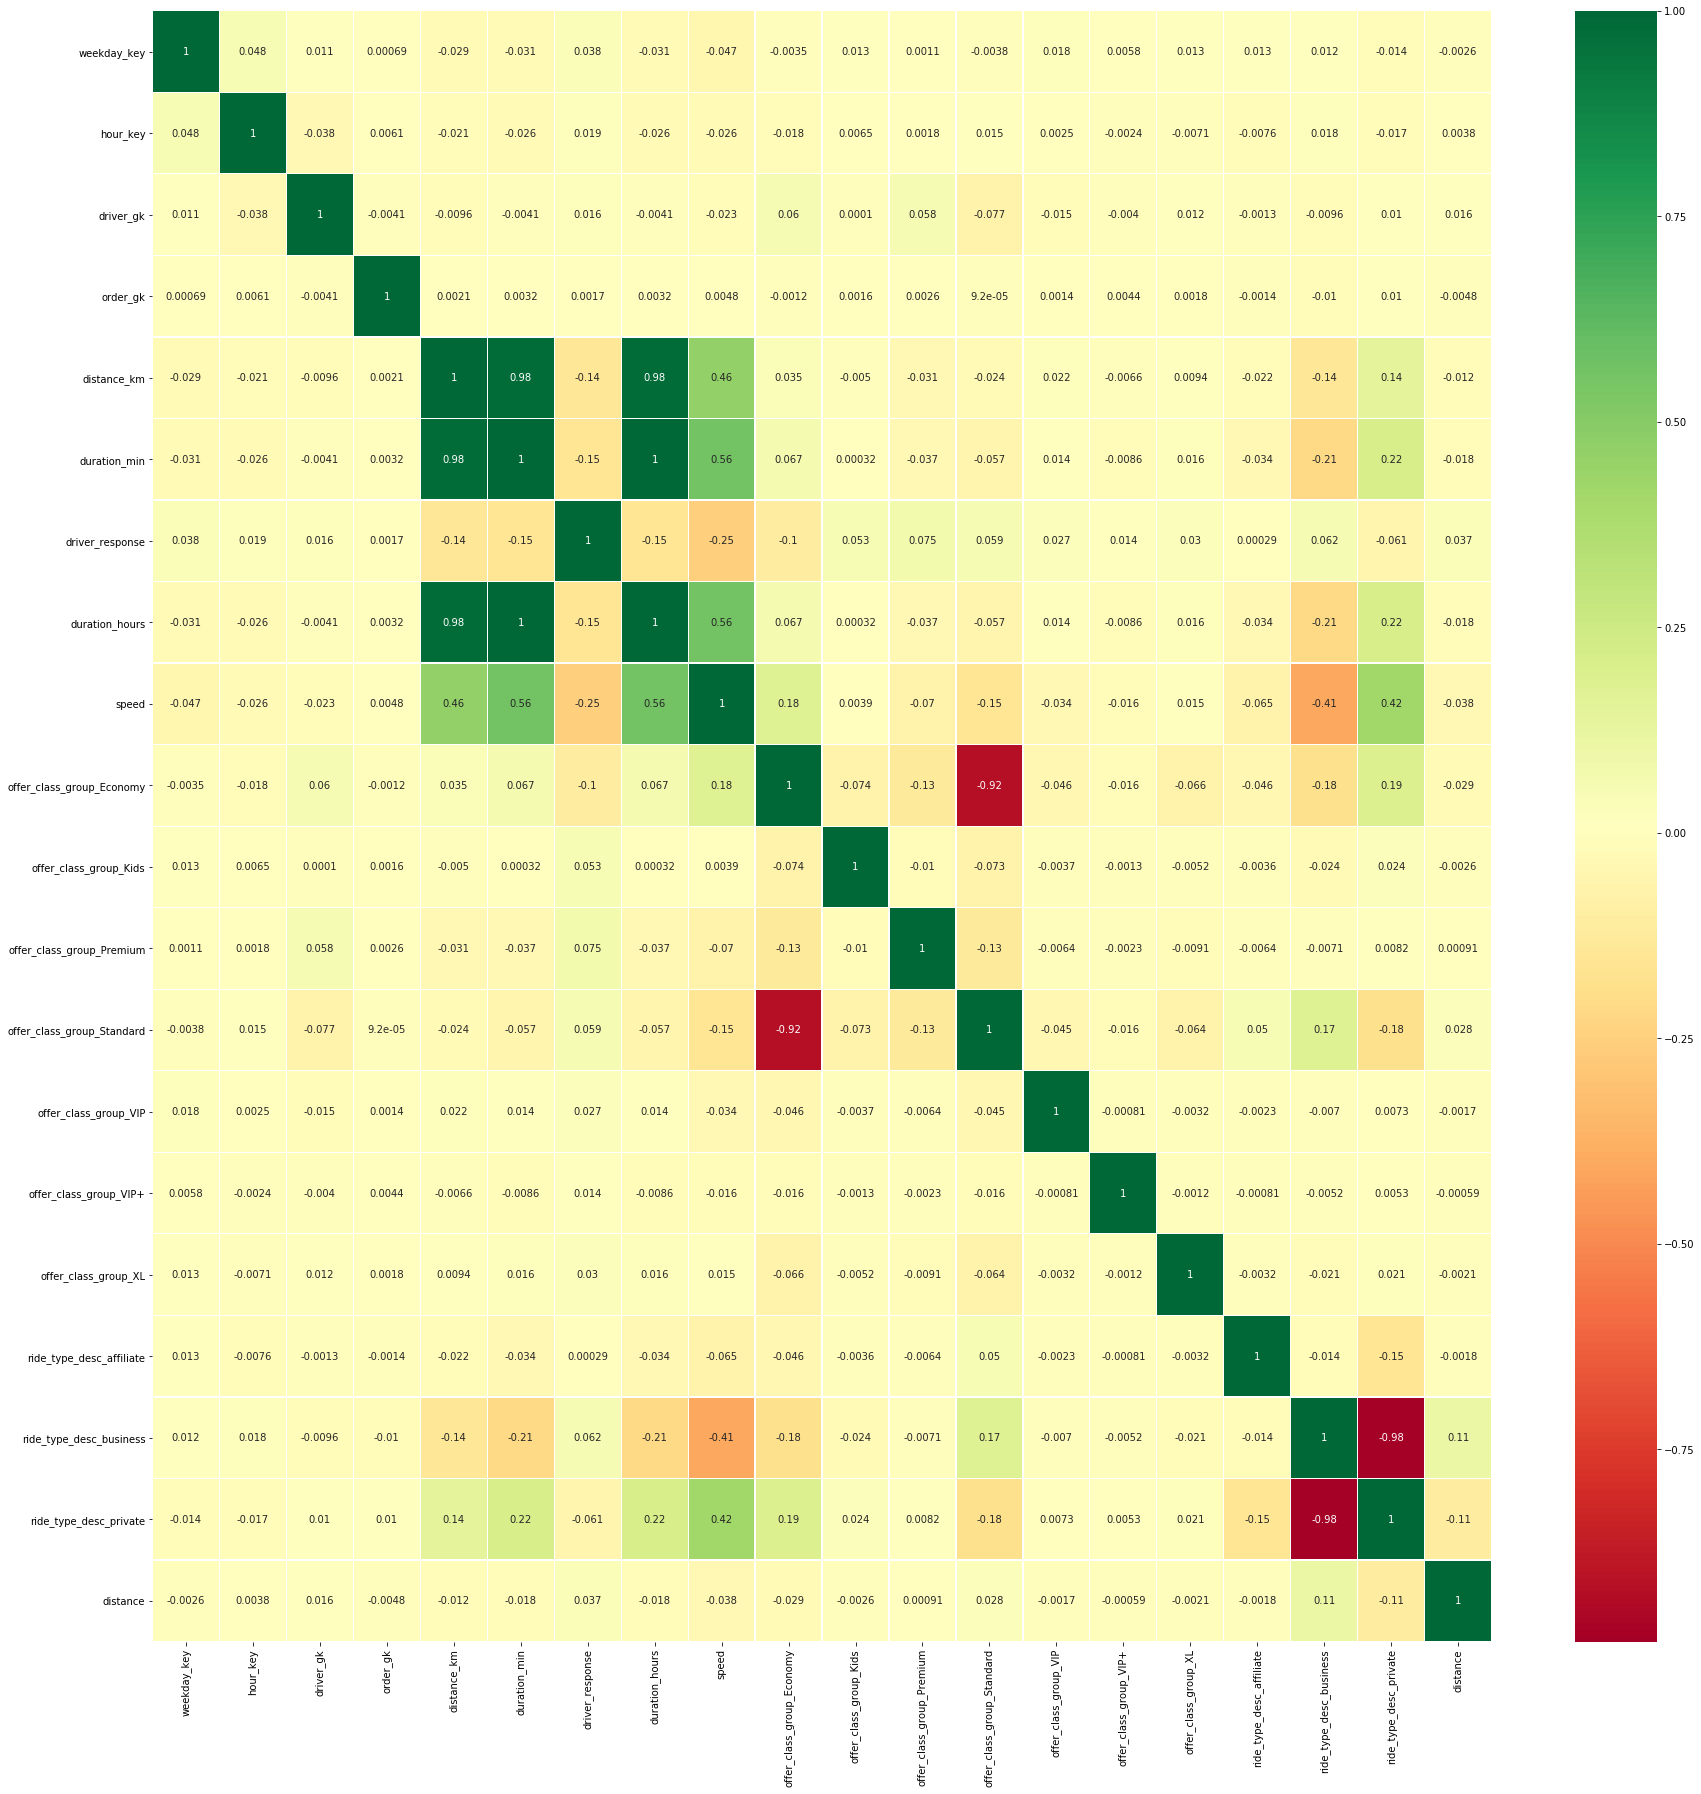

In [30]:
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(30,30)
plt.show()

### Обучение 

In [31]:
output_y = df['driver_response'] ### то, что предсказываем

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('driver_response', axis=1), output_y, test_size=0.2)

In [33]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((79872, 19), (19968, 19), (79872,), (19968,))

In [34]:
from sklearn.ensemble import RandomForestClassifier

# создаем модель деревья решений
# выбираем 100 деревьев в качестве параметра
model=RandomForestClassifier(n_estimators=100)

# обучаем модель
model.fit(X_train,y_train)

RandomForestClassifier()

In [35]:
from sklearn.metrics import classification_report

In [36]:
model_pred = model.predict(X_test)

print(classification_report(y_test, model_pred))

              precision    recall  f1-score   support

           0       0.78      0.72      0.75     10145
           1       0.73      0.79      0.76      9823

    accuracy                           0.76     19968
   macro avg       0.76      0.76      0.76     19968
weighted avg       0.76      0.76      0.76     19968



#### Уберу мультиколлиниарные признаки

In [37]:
def remove_collinear_features(x, threshold):
    '''
    Objective:
        Remove collinear features in a dataframe with a correlation coefficient
        greater than the threshold. Removing collinear features can help a model
        to generalize and improves the interpretability of the model.
        
    Inputs: 
        threshold: any features with correlations greater than this value are removed
    
    Output: 
        dataframe that contains only the non-highly-collinear features
    '''
    
    # Dont want to remove correlations between driver_response
    y = x['driver_response']
    x = x.drop(columns = ['driver_response'])
    
    # Calculate the correlation matrix
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    # Iterate through the correlation matrix and compare correlations
    for i in iters:
        for j in range(i):
            item = corr_matrix.iloc[j:(j+1), i:(i+1)]
            col = item.columns
            row = item.index
            val = abs(item.values)
            
            # If correlation exceeds the threshold
            if val >= threshold: #or val > (threshold * -1):
#                 Print the correlated features and the correlation value
#                 print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
                drop_cols.append(col.values[0])

    # Drop one of each pair of correlated columns
    drops = set(drop_cols)
    x = x.drop(columns = drops)
    
    # Add the target column back in to the data
    x['driver_response'] = y
               
    return x

In [38]:
df = remove_collinear_features(df, 0.7)

In [39]:
df.head()

,weekday_key,hour_key,driver_gk,order_gk,distance_km,speed,offer_class_group_Economy,offer_class_group_Kids,offer_class_group_Premium,offer_class_group_VIP,offer_class_group_VIP+,offer_class_group_XL,ride_type_desc_affiliate,ride_type_desc_business,distance,driver_response
1105373,5,20,6080,174182,-1.000,-1.000000,1,0,0,0,0,0,0,0,0.020890,0
759733,5,14,6080,358774,18.802,44.736487,0,0,0,0,0,0,0,0,0.050597,1
416977,6,14,6080,866260,6.747,41.308163,1,0,0,0,0,0,0,0,0.006442,0
889660,2,6,6080,163522,-1.000,-1.000000,1,0,0,0,0,0,0,0,0.009697,1
1120055,4,16,6080,506710,12.383,38.596364,1,0,0,0,0,0,0,0,0.010694,1


In [40]:
df.shape

(99840, 16)

In [41]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('driver_response', axis=1), output_y, test_size=0.2)

In [42]:
model=RandomForestClassifier(n_estimators=100)

# обучаем модель
model.fit(X_train, y_train)

RandomForestClassifier()

In [43]:
model_pred = model.predict(X_test)

print(classification_report(y_test, model_pred))

              precision    recall  f1-score   support

           0       0.79      0.74      0.76     10143
           1       0.75      0.80      0.77      9825

    accuracy                           0.77     19968
   macro avg       0.77      0.77      0.77     19968
weighted avg       0.77      0.77      0.77     19968



In [ ]:
X = df.drop('driver_response', axis=1)
y_pred = 

### Корреляция после применения функции remove_collinear_features

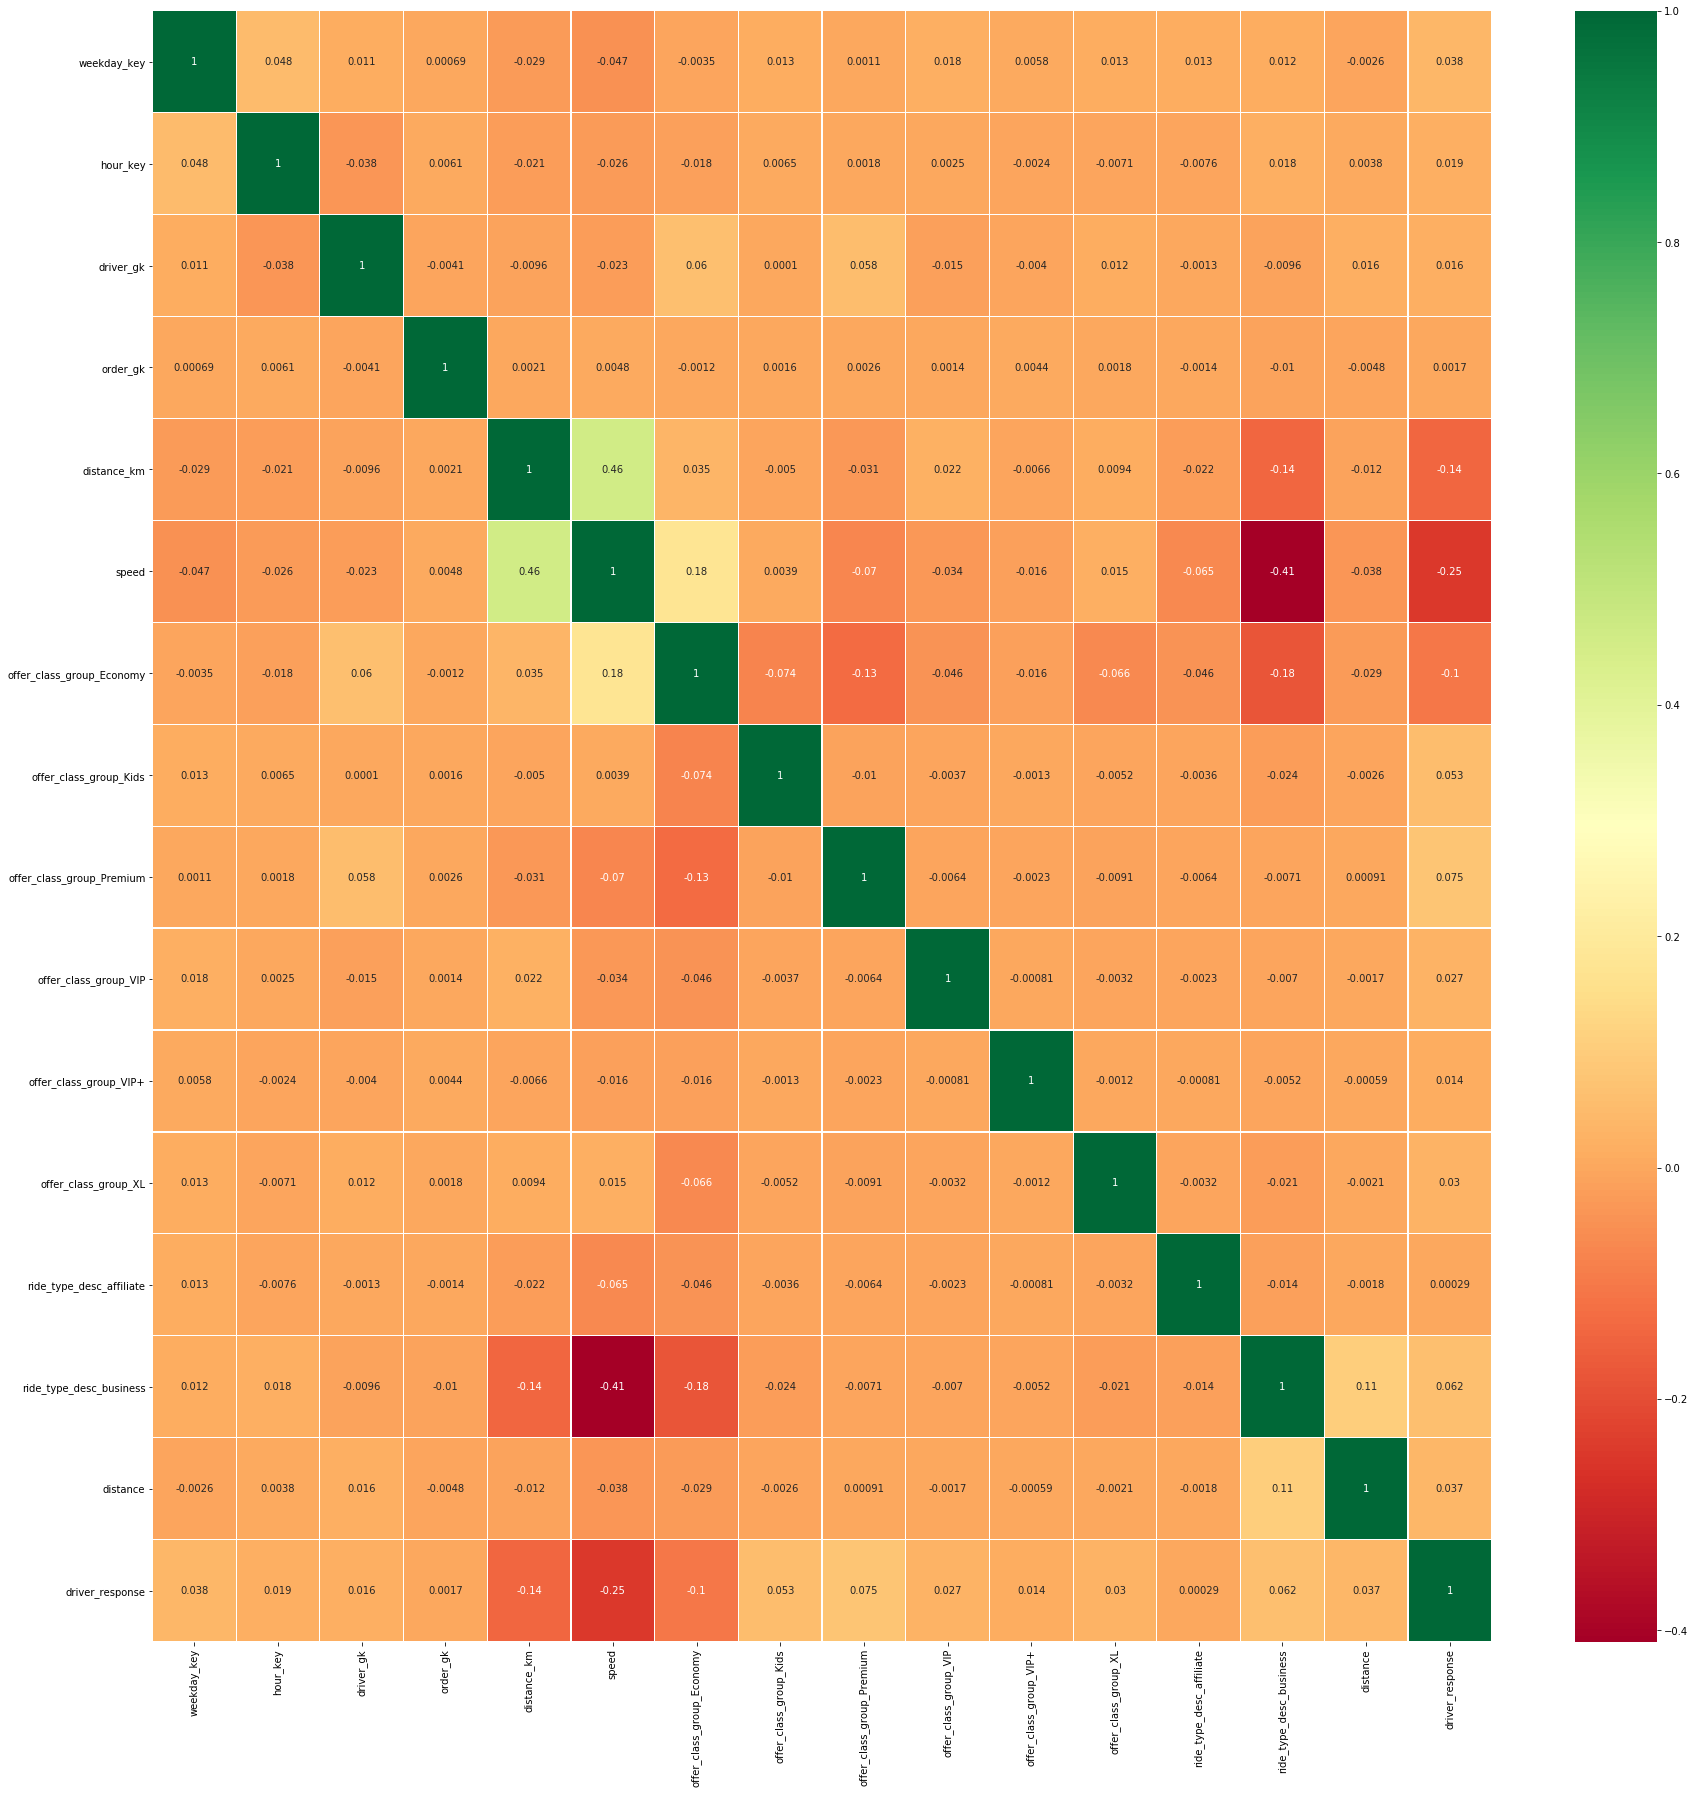

In [44]:
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(30,30)
plt.show()